In [56]:
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv("penguins (1).csv")

In [6]:
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [10]:
df.shape

(344, 9)

In [12]:
df.dtypes

,0
Unnamed: 0,int64
species,object
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object
year,int64


In [16]:
df.isnull().sum()

,0
Unnamed: 0,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


In [14]:
df['species'].value_counts()

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


In [21]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [35]:
df['bill_length_mm'].fillna(df['bill_length_mm'].mean(), inplace=True)

/tmp/ipython-input-1900298951.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bill_length_mm'].fillna(df['bill_length_mm'].mean(), inplace=True)


In [57]:
df = pd.read_csv("penguins (1).csv")
display(df.head())

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [59]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [60]:
df['bill_length_mm'] = df['bill_length_mm'].fillna(df['bill_length_mm'].mean())

In [64]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0
year,0


In [61]:
df['bill_depth_mm'] = df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())

In [62]:
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

In [63]:
df.duplicated().sum()

np.int64(0)

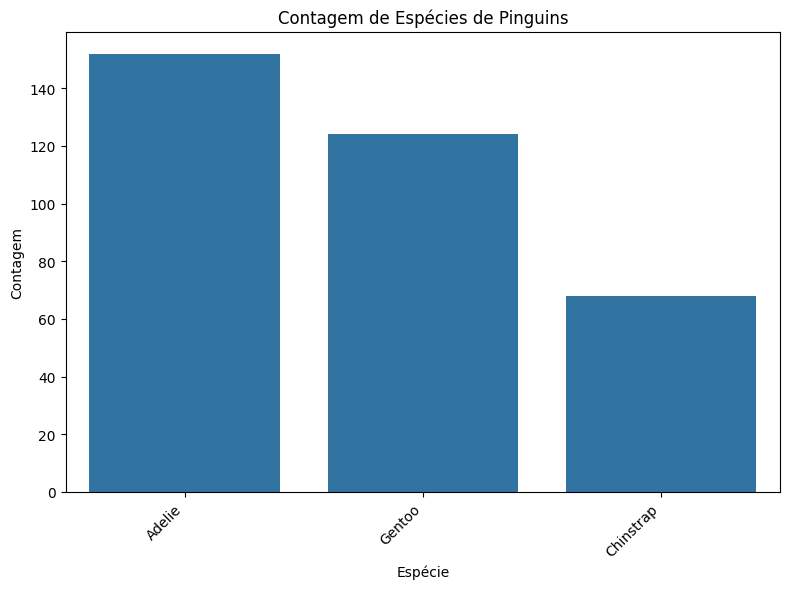

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

species_counts = df['species'].value_counts().reset_index()
species_counts.columns = ['species', 'count']

plt.figure(figsize=(8, 6))
sns.barplot(x="species", y="count", data=species_counts)
plt.title('Contagem de Espécies de Pinguins')
plt.xlabel('Espécie')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

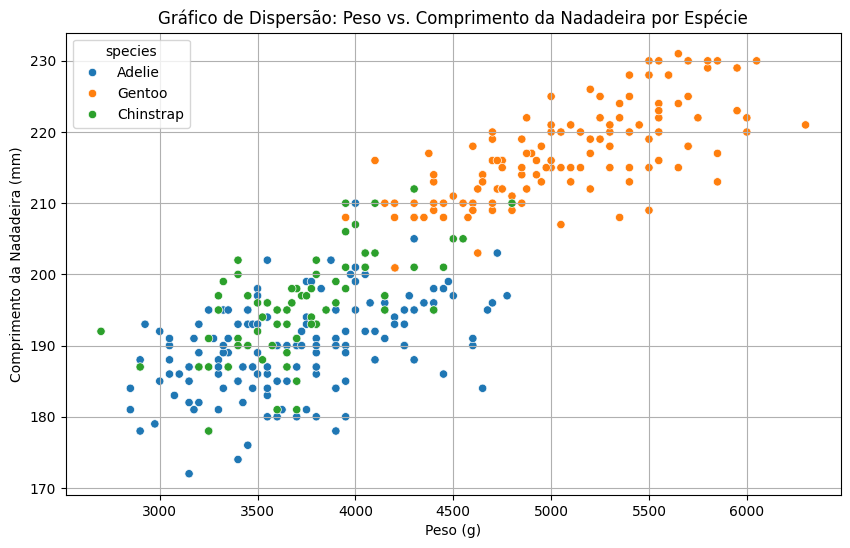

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='body_mass_g', y='flipper_length_mm', hue='species', data=df)
plt.title('Gráfico de Dispersão: Peso vs. Comprimento da Nadadeira por Espécie')
plt.xlabel('Peso (g)')
plt.ylabel('Comprimento da Nadadeira (mm)')
plt.grid(True)
plt.show()

In [71]:
X = df.drop(columns=['species'])
y = df['species']

In [72]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

onehot_encoder = OneHotEncoder(sparse_output=False)
sex_encoded = onehot_encoder.fit_transform(X[['sex']])
sex_encoded_df = pd.DataFrame(sex_encoded, columns=onehot_encoder.get_feature_names_out(['sex']))
X = X.drop(columns=['sex'])
X = pd.concat([X, sex_encoded_df], axis=1)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

display(X.head())
display(y[:5])

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male
0,Torgersen,39.10000,18.70000,181.000000,3750.000000,2007,0.0,1.0
1,Torgersen,39.50000,17.40000,186.000000,3800.000000,2007,1.0,0.0
2,Torgersen,40.30000,18.00000,195.000000,3250.000000,2007,1.0,0.0
3,Torgersen,43.92193,17.15117,200.915205,4201.754386,2007,0.0,1.0
4,Torgersen,36.70000,19.30000,193.000000,3450.000000,2007,1.0,0.0


array([0, 0, 0, 0, 0])

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
display(X_train.head())
display(X_test.head())
display(y_train[:5])
display(y_test[:5])

display(X_train.info())
display(X_test.info())

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male
31,Dream,37.2,18.1,178.0,3900.0,2007,0.0,1.0
245,Biscoe,49.5,16.1,224.0,5650.0,2009,0.0,1.0
277,Dream,50.0,19.5,196.0,3900.0,2007,0.0,1.0
165,Biscoe,48.4,14.6,213.0,5850.0,2007,0.0,1.0
250,Biscoe,48.4,14.4,203.0,4625.0,2009,1.0,0.0


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male
194,Biscoe,45.3,13.7,210.0,4300.0,2008,1.0,0.0
157,Biscoe,46.5,13.5,210.0,4550.0,2007,1.0,0.0
225,Biscoe,46.5,14.8,217.0,5200.0,2008,1.0,0.0
208,Biscoe,43.8,13.9,208.0,4300.0,2008,1.0,0.0
318,Dream,50.9,19.1,196.0,3550.0,2008,0.0,1.0


array([0, 2, 1, 2, 2])

array([2, 2, 2, 2, 1])

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 31 to 102
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             240 non-null    object 
 1   bill_length_mm     240 non-null    float64
 2   bill_depth_mm      240 non-null    float64
 3   flipper_length_mm  240 non-null    float64
 4   body_mass_g        240 non-null    float64
 5   year               240 non-null    int64  
 6   sex_female         240 non-null    float64
 7   sex_male           240 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 16.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 194 to 266
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             104 non-null    object 
 1   bill_length_mm     104 non-null    float64
 2   bill_depth_mm      104 non-null    float64
 3   flipper_length_mm  104 non-null    float64
 4   body_mass_g        104 non-null    float64
 5   year               104 non-null    int64  
 6   sex_female         104 non-null    float64
 7   sex_male           104 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 7.3+ KB


None

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [90]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [80]:
display(X_train.head())
display(X_test.head())

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male,island_Biscoe,island_Dream,island_Torgersen
31,37.2,18.1,178.0,3900.0,2007,0.0,1.0,0.0,1.0,0.0
245,49.5,16.1,224.0,5650.0,2009,0.0,1.0,1.0,0.0,0.0
277,50.0,19.5,196.0,3900.0,2007,0.0,1.0,0.0,1.0,0.0
165,48.4,14.6,213.0,5850.0,2007,0.0,1.0,1.0,0.0,0.0
250,48.4,14.4,203.0,4625.0,2009,1.0,0.0,1.0,0.0,0.0


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male,island_Biscoe,island_Dream,island_Torgersen
194,45.3,13.7,210.0,4300.0,2008,1.0,0.0,1.0,0.0,0.0
157,46.5,13.5,210.0,4550.0,2007,1.0,0.0,1.0,0.0,0.0
225,46.5,14.8,217.0,5200.0,2008,1.0,0.0,1.0,0.0,0.0
208,43.8,13.9,208.0,4300.0,2008,1.0,0.0,1.0,0.0,0.0
318,50.9,19.1,196.0,3550.0,2008,0.0,1.0,0.0,1.0,0.0


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [81]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [82]:
logistic_predictions = logistic_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)

display(logistic_predictions[:5])
display(decision_tree_predictions[:5])

array([2, 2, 2, 2, 1])

array([2, 2, 2, 2, 1])

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [84]:
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions, average='weighted')
logistic_recall = recall_score(y_test, logistic_predictions, average='weighted')
logistic_f1 = f1_score(y_test, logistic_predictions, average='weighted')

decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_precision = precision_score(y_test, decision_tree_predictions, average='weighted')
decision_tree_recall = recall_score(y_test, decision_tree_predictions, average='weighted')
decision_tree_f1 = f1_score(y_test, decision_tree_predictions, average='weighted')

print("Métricas de Avaliação - Regressão Logística:")
print(f"Acurácia: {logistic_accuracy:.4f}")
print(f"Precisão: {logistic_precision:.4f}")
print(f"Recall: {logistic_recall:.4f}")
print(f"F1-score: {logistic_f1:.4f}")
print("\nMétricas de Avaliação - Árvore de Decisão:")
print(f"Acurácia: {decision_tree_accuracy:.4f}")
print(f"Precisão: {decision_tree_precision:.4f}")
print(f"Recall: {decision_tree_recall:.4f}")
print(f"F1-score: {decision_tree_f1:.4f}")

Métricas de Avaliação - Regressão Logística:
Acurácia: 1.0000
Precisão: 1.0000
Recall: 1.0000
F1-score: 1.0000

Métricas de Avaliação - Árvore de Decisão:
Acurácia: 0.9904
Precisão: 0.9906
Recall: 0.9904
F1-score: 0.9904


In [85]:
print("Comparação das Métricas de Avaliação:")
print("-" * 40)
print(f"Métrica     | Regressão Logística | Árvore de Decisão")
print("-" * 40)
print(f"Acurácia    | {logistic_accuracy:<19.4f} | {decision_tree_accuracy:.4f}")
print(f"Precisão    | {logistic_precision:<19.4f} | {decision_tree_precision:.4f}")
print(f"Recall      | {logistic_recall:<19.4f} | {decision_tree_recall:.4f}")
print(f"F1-score    | {logistic_f1:<19.4f} | {decision_tree_f1:.4f}")
print("-" * 40)

if logistic_accuracy > decision_tree_accuracy:
    print("O modelo de Regressão Logística teve melhor desempenho geral (maior Acurácia).")
elif decision_tree_accuracy > logistic_accuracy:
    print("O modelo de Árvore de Decisão teve melhor desempenho geral (maior Acurácia).")
else:
    # Additional checks for other metrics if accuracies are equal
    if logistic_f1 > decision_tree_f1:
         print("O modelo de Regressão Logística teve melhor desempenho geral (maior F1-score).")
    elif decision_tree_f1 > logistic_f1:
         print("O modelo de Árvore de Decisão teve melhor desempenho geral (maior F1-score).")
    else:
         print("Ambos os modelos tiveram desempenho similar.")


Comparação das Métricas de Avaliação:
----------------------------------------
Métrica     | Regressão Logística | Árvore de Decisão
----------------------------------------
Acurácia    | 1.0000              | 0.9904
Precisão    | 1.0000              | 0.9906
Recall      | 1.0000              | 0.9904
F1-score    | 1.0000              | 0.9904
----------------------------------------
O modelo de Regressão Logística teve melhor desempenho geral (maior Acurácia).
